# Autoencoder


## Introduction

## Model 1


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Epoch 1/200
42/42 - 0s - loss: 0.2377 - val_loss: 0.1857
Epoch 2/200
42/42 - 0s - loss: 0.0401 - val_loss: 0.1007
Epoch 3/200
42/42 - 0s - loss: 0.0255 - val_loss: 0.0526
Epoch 4/200
42/42 - 0s - loss: 0.0199 - val_loss: 0.0277
Epoch 5/200
42/42 - 0s - loss: 0.0168 - val_loss: 0.0180
Epoch 6/200
42/42 - 0s - loss: 0.0149 - val_loss: 0.0139
Epoch 7/200
42/42 - 0s - loss: 0.0138 - val_loss: 0.0104
Epoch 8/200
42/42 - 0s - loss: 0.0130 - val_loss: 0.0091
Epoch 9/200
42/42 - 0s - loss: 0.0126 - val_loss: 0.0074
Epoch 10/200
42/42 - 0s - loss: 0.0106 - val_loss: 0.0067
Epoch 11/200
42/42 - 0s - loss: 0.0102 - val_loss: 0.0066
Epoch 12/200
42/42 - 0s - loss: 0.0101 - val_loss: 0.0056
Epoch 13/200
42/42 - 0s - loss: 0.0092 - val_loss: 0.0059
Epoch 14/200
42/42 - 0s - loss: 0.0092 - val_loss: 0.0081
Epoch 15/200
42/42 - 0s - loss: 0.0088 - val_loss: 0.0045
Epoch 16/200
42/42 - 0s - loss: 0.0083 - val_loss: 0.

42/42 - 0s - loss: 0.0038 - val_loss: 0.0019
Epoch 141/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0019
Epoch 142/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0018
Epoch 143/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0015
Epoch 144/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0018
Epoch 145/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0015
Epoch 146/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0025
Epoch 147/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0010
Epoch 148/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0012
Epoch 149/200
42/42 - 0s - loss: 0.0043 - val_loss: 0.0021
Epoch 150/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0029
Epoch 151/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0021
Epoch 152/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0016
Epoch 153/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0013
Epoch 154/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0013
Epoch 155/200
42/42 - 0s - loss: 0.0032 - val_loss: 0.0012
Epoch 156/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0020
Epoch 157/2

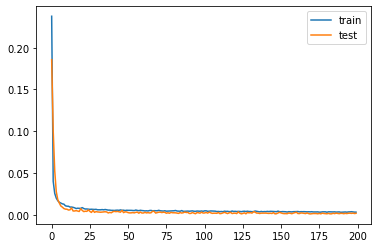

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [1]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

## Model 2

In [ ]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

## Using Autoencoder for Feature Engineering and Prediction

In [4]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9151515151515152


/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## References

- [Autoencoder Feature Extraction for Classification](https://machinelearningmastery.com/autoencoder-for-classification/)